<a href="https://colab.research.google.com/github/Sourasheesh/Sourasheesh/blob/main/NeralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


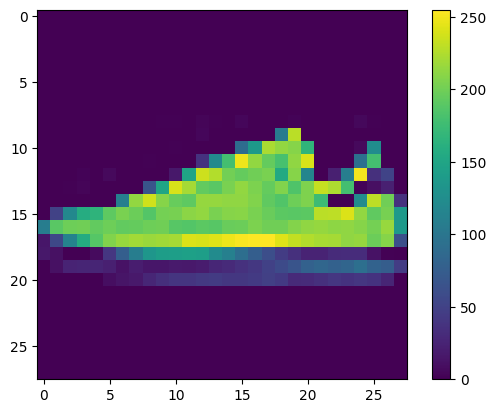

In [14]:

#import
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


#dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

#looking at what we are working with
train_images.shape

#creating labels
class_names = ['T-shir/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

#output images
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()


#data preprocessing
train_images = train_images/255.0

test_images = test_images/255.0


In [25]:
#creating model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer
    keras.layers.Dense(128,activation='relu'),#hidden layer
    keras.layers.Dense(10,activation='softmax')#output layer
])

#complie the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4987 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3728 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3373 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3121 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2961 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2802 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2675 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2570 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2489 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.23

In [24]:
#evaluate

test_loss, test_acc=model.evaluate(test_images,test_labels, verbose =1)
print('Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8577
Accuracy: 0.857699990272522


In [27]:
predictions = model.predict(test_images)
np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 1s 2ms/step


9

Pick a number: 24
1/1 [==============================] - 0s 29ms/step


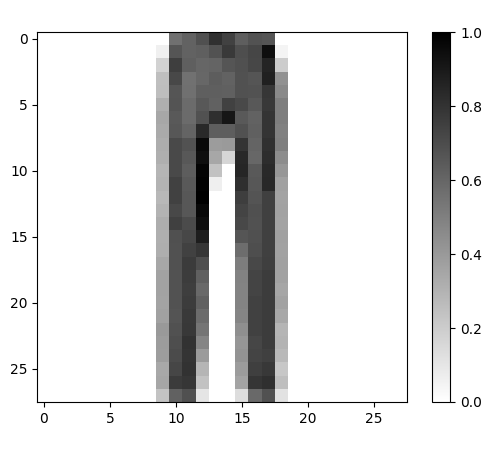

In [29]:
#function to guess the dress
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
